importing the packages:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset:

In [ ]:
cali = fetch_california_housing()
cali_data = pd.DataFrame(data=cali['data'],columns=cali['feature_names'])
cali_data["MEDV"] = cali['target']
cali_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Mathematical Formulation
$\bullet$ Hypothesis: $y^{̂}(x)= \omega_0 + \omega_1 x$

$\bullet$ Parameters that need to be updated: $\omega_0, \omega_1$

$\bullet$ Cost Function: $J(\omega_0, \omega_1)=\frac{1}{2m}∑^m_{i=1}(Y^{(i)}-y^̂(x^{(i)}))^2$  

$\bullet: $ Goal: min$_{ω_0,ω_1} \; J(ω_0,ω_1)$


Predict the price:


In [ ]:
def predPrice(X,W):
  return np.dot(X,W)

Cost Formula:
$$ C(Y, y^{̂}) = \frac{1}{n}∑^{n}_{i=1} (Y - y^{̂})^2$$

In [ ]:
def calculateCost(X,W,Y):
  pred = predPrice(X,W)
  return ((Y - pred)**2).mean()/2

Line Plotter:

In [ ]:
def plot_line(X,W,Y):
  y_vals = predPrice(X,W)

  plt.xlabel('No. of Rooms in the house (RM)')
  plt.ylabel('Price of the house (MEDV)')

  plt.scatter(X[:,1],Y, color='red', label='Actual')
  plt.plot(X[:,1], y_vals, color='black', label='Predicted')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
def plot_cost(cost):
  plt.plot(range(1, len(cost) + 1), cost)
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.show()

Gradient Descent learning weight formula:
$$ ω_{j+1} := ω_j - α ⋅ \frac{1}{m}∑^{m}_{i=0}(Y^{(i)}-ŷ^{(i)})⋅x_j^{(i)} $$

In [ ]:
def fit(n_iter,X,Y):
  W0 = []
  W1 = []
  costs = []

  N = len(cali['target'])
  W = np.zeros(2)
  c = 0
  alpha = 0.02 # Learning Rate

  # Main part of the algorithm
  for i in range(n_iter):
    pred = predPrice(X,W)  # Predict values

    W[0] += (2/N) *(Y - pred).mean()
    W[1] += alpha * (2/N) * (X[:,1] * (Y - pred)).mean()

    W = np.array([W[0],W[1]])

    J = calculateCost(X,W,Y)  # Cost Funciton
    W0.append(W[0])
    W1.append(W[1])
    costs.append(J)
    c = i + 1  # Stage of iteration

  print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
  plot_line(X,W,Y)
  plot_cost(costs)

Iteration: 50000, Cost = 0.659019718588503, Weights = [1.37681928 0.12305852]


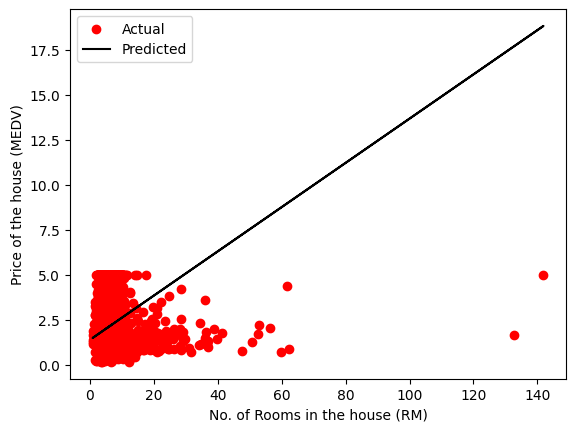

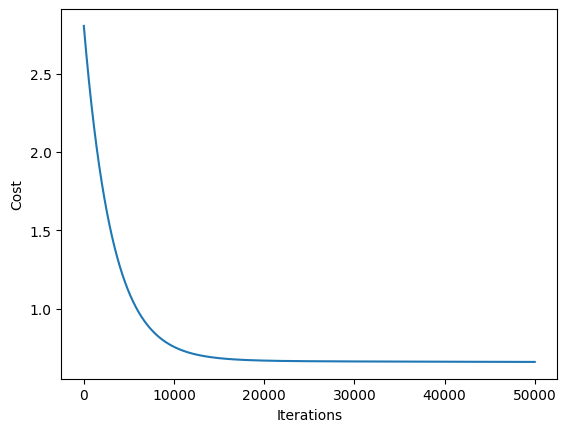

In [ ]:
n_iter=50000
x = cali_data["AveRooms"]
X = np.column_stack((np.ones(len(x)),x))
Y = cali_data["MEDV"]
fit(n_iter,X,Y)

Stochstic Gradient learning weight formula:
$$ ω_{j+1} := ω_j - α ⋅ (Y^{(i)}-y^̂(x^{(i)}))⋅x_j^{(i)} $$

In [ ]:
def fit(n_iter,X,Y):
  W0 = []
  W1 = []
  costs = []

  N = len(cali['target'])
  W = np.zeros(2)
  c = 0
  alpha = 0.02 # Learning Rate

  for i in range(n_iter):
    pred = predPrice(X,W)  # Predict values

    W[0] += (Y - pred).mean()
    W[1] += alpha*(X[:,1] * (Y - pred)).mean()

    W = np.array([W[0],W[1]])

    J = calculateCost(X,W,Y)  # Cost Funciton
    W0.append(W[0])
    W1.append(W[1])
    costs.append(J)
    c = i + 1  # Stage of iteration

  print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
  plot_line(X,W,Y)
  plot_cost(costs)

Iteration: 10, Cost = 0.6544206189838785, Weights = [1.46766851 0.10376041]


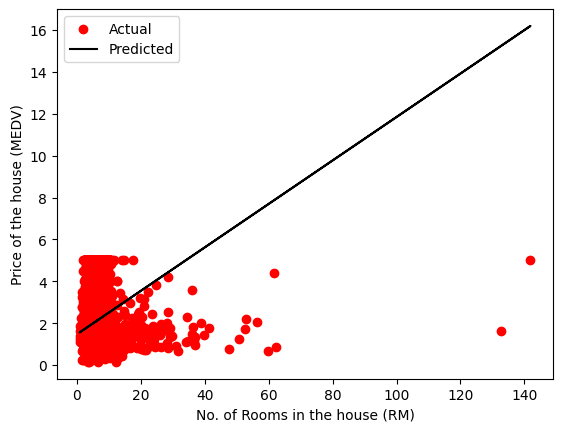

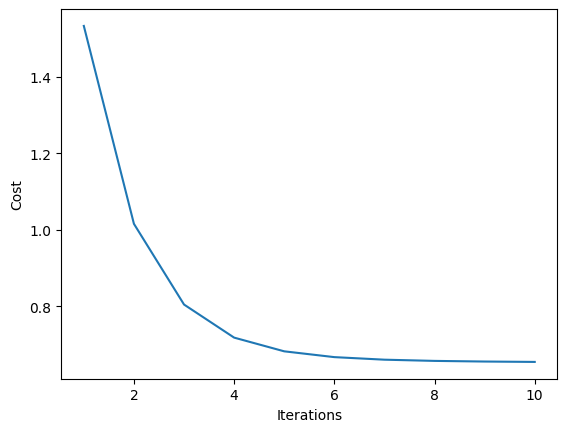

In [ ]:
n_iter=10
x = cali_data["AveRooms"]
X = np.column_stack((np.ones(len(x)),x))
Y = cali_data["MEDV"]
fit(n_iter,X,Y)

Mini batch learning weight formula:
$$ ω_{j+1} := ω_j - α ⋅ \frac{1}{m}∑^{i+m-1}_{k=i}(Y^{(k)}-ŷ^{(k)})⋅x_j^{(k)} $$

In [ ]:
def fit(n_iter,X,Y):
  W0 = []
  W1 = []
  costs = []

  N = len(cali['target'])
  W = np.zeros(2)
  c = 0
  alpha = 0.02 # Learning rate

  for i in range(n_iter):
    pred = predPrice(X,W)  # Predict values

    W[0] += (2/N) *(Y - pred).mean()
    W[1] += (2/(N-1)) * (X[:,1] * (Y - pred)).mean()

    W = np.array([W[0],W[1]])

    J = calculateCost(X,W,Y)  # Cost Funciton
    W0.append(W[0])
    W1.append(W[1])
    costs.append(J)
    c = i + 1

  print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
  plot_line(X,W,Y)
  plot_cost(costs)

Iteration: 1000, Cost = 0.8744322358551473, Weights = [0.07420952 0.30795103]


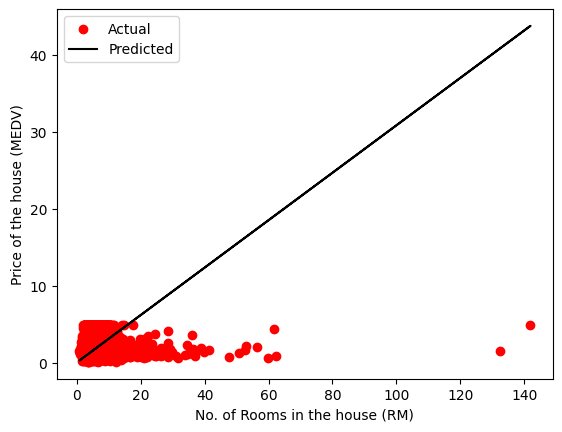

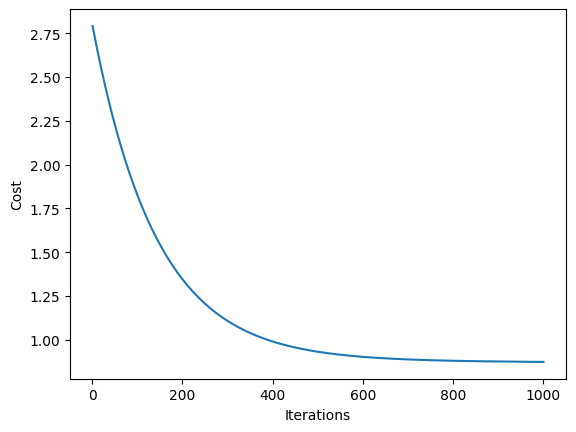

In [ ]:
n_iter=1000
x = cali_data["AveRooms"]
X = np.column_stack((np.ones(len(x)),x))
Y = cali_data["MEDV"]
fit(n_iter,X,Y)

Full Pesudocodes from: https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch
